# Pymaceuticals Inc.
---

### Analysis

- Based on the bar graph, it can be seen that Capomulin and Ramicane had the most number of mice in comparison to other study groups. At the same time, the Propriva group had the least number of mice. The total number of mice in the study was 248 after removing the duplicated mouse ID. The proportion of male vs female is almost equal at 51% and 49%, respectively. 

- There is a strong positive correlation of 0.84 between mouse weight and average tumor volume.This suggests that tumor volume increases as one's weight increases. 

- Mice that received Capomulin or Ramicane treatment regimen had lower tumor volume in comparison to those treated with either Infubinol or Ceftamin regimen. Based on these findings, Capomulin and Ramicane seem to be the most effective for squamous cell carcinoma (SCC) treatment. 
 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID") 

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [65]:
# Checking the number of mice.
Total_mice=combined_df["Mouse ID"].nunique()

print(f"There are {Total_mice} mice in this study")


There are 249 mice in this study


In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]

print("Duplicate mice:")
print(duplicate_mice["Mouse ID"].unique())

Duplicate mice:
['g989']


In [67]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_ID = "g989"

duplicate_data = combined_df.loc[combined_df["Mouse ID"] == duplicate_mouse_ID, :]
print(duplicate_data)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

duplicate_mouse_ID = "g989"
clean_df=combined_df[combined_df["Mouse ID"]!= duplicate_mouse_ID]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [69]:
#Checking the number of mice in the clean DataFrame.
Reduced_num_mice= clean_df["Mouse ID"].nunique()
print("Number of mice in the clean DataFrame:", Reduced_num_mice)

Number of mice in the clean DataFrame: 248


## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = clean_df.groupby("Drug Regimen")

tumor_mean = summary_stats_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_stats_df["Tumor Volume (mm3)"].median()
tumor_variance = summary_stats_df["Tumor Volume (mm3)"].var()
tumor_stdev = summary_stats_df["Tumor Volume (mm3)"].std()
tumor_sem = summary_stats_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume" : tumor_median, "Tumor Volume Variance":tumor_variance,"Tumor Volume Std. Dev.":tumor_stdev,"Tumor Volume Std. Err.":tumor_sem})
summary_df.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats_table = clean_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats_table.head(10)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

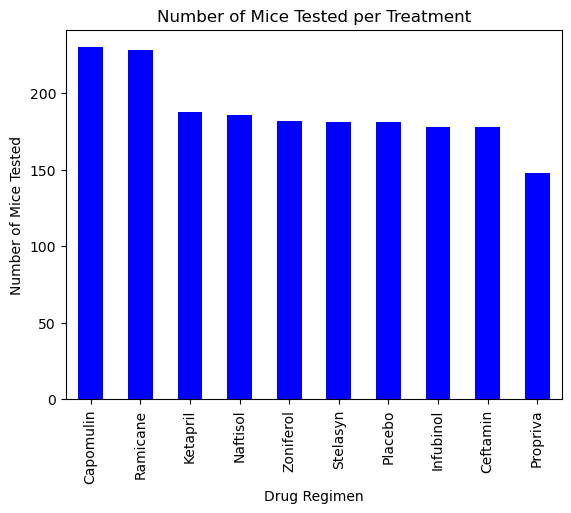

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_num = clean_df["Drug Regimen"].value_counts()
mice_num

Pandas_plot = mice_num.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Treatment")

plt.show

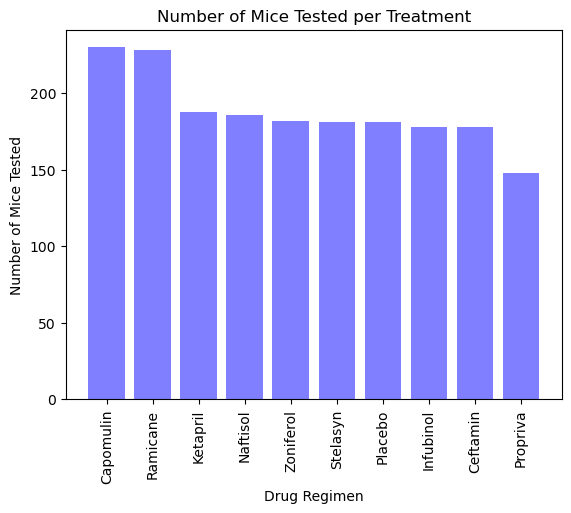

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_num.index.values
y_axis = mice_num.values

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()



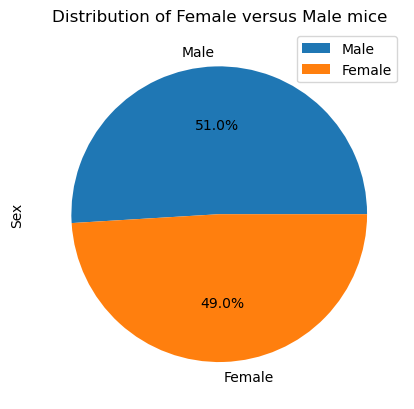

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = clean_df['Sex'].value_counts()
gender_count.plot.pie(autopct = "%1.1f%%")
plt.title("Distribution of Female versus Male mice")
plt.legend(labels=gender_count.index)
plt.show()


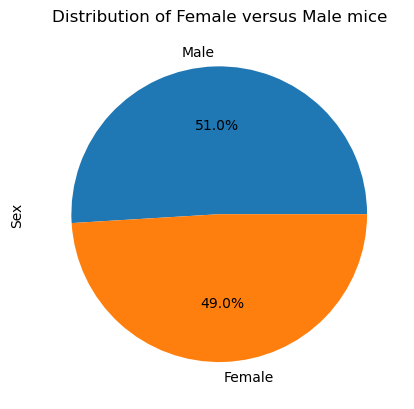

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%")
plt.title("Distribution of Female versus Male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data = last_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [77]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_total = [ ]

for drug in treatments:

    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_total.append(tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quantiles=tumor_vol.quantile([0.25,0.5,0.75])
    iqr = quantiles[0.75]-quantiles[0.25]
    lowerbound=quantiles[0.25] - iqr
    upperbound=quantiles[0.75]+iqr
    outlier=tumor_vol.loc[(tumor_vol<lowerbound)|(tumor_vol>upperbound)]
    print(f"{drug}'s potential outliers: {outlier}")


Capomulin's potential outliers: 174    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 96    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


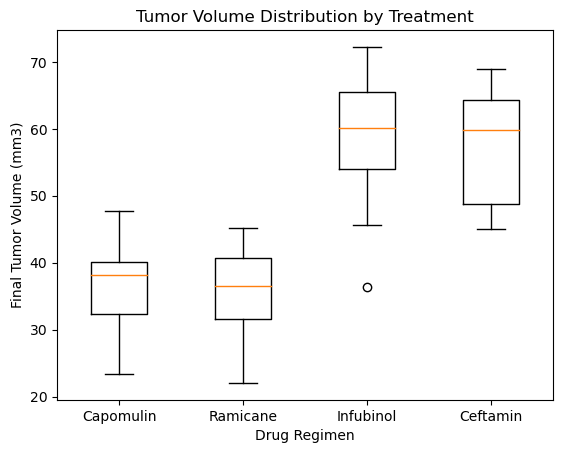

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Tumor Volume Distribution by Treatment')
ax.boxplot(tumor_vol_total, labels=treatments)
plt.show()


## Line and Scatter Plots

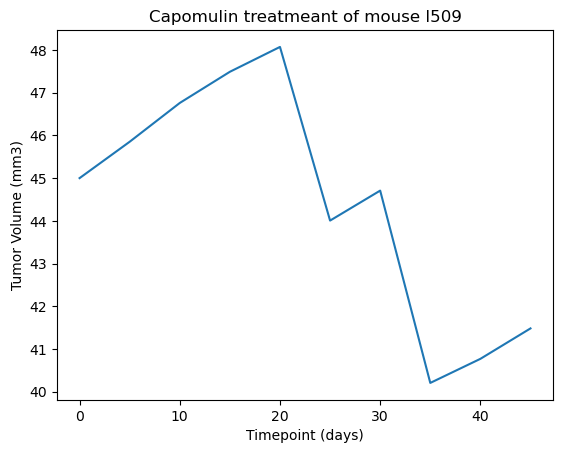

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
Capomulin_df.head()

#Data for a specific mouse (e.g. Mouse ID = "l509")
Mouse_capomulin = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
Mouse_capomulin

x_axis = Mouse_capomulin["Timepoint"]
y_axis = Mouse_capomulin["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse l509')
plt.show()


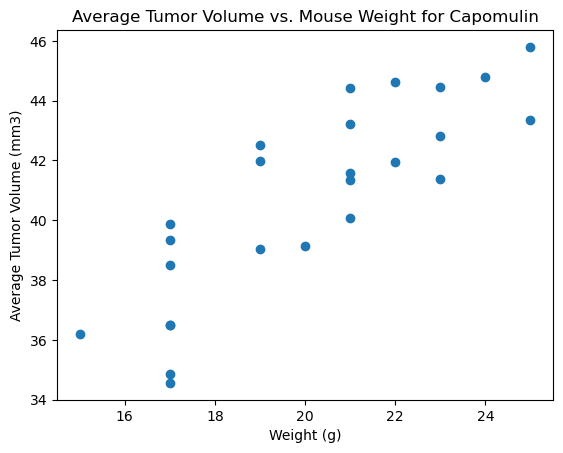

In [80]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

grouped_capomulin_df = Capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'})

fig, ax = plt.subplots()
ax.scatter(grouped_capomulin_df['Weight (g)'], grouped_capomulin_df['Tumor Volume (mm3)'])
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.set_title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


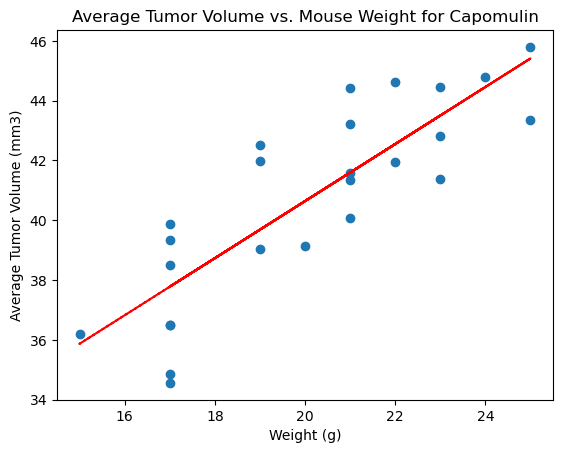

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = grouped_capomulin_df['Weight (g)']
mean_tum_vol = grouped_capomulin_df['Tumor Volume (mm3)']

corr = round(st.pearsonr(mouse_weight,mean_tum_vol)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

slope, int, r, p, std_err = stats.linregress(mouse_weight,mean_tum_vol) 
y = slope * (mouse_weight) + int

fig, ax = plt.subplots()
ax.scatter(mouse_weight,mean_tum_vol)
ax.plot(mouse_weight,y,"r--")

# Set the axis labels and title
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.set_title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.show()
